In [1]:
import pandas as pd
import numpy as np
import altair as alt

from collections import defaultdict

alt.data_transformers.enable('data_server')
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

## About the Dataset  

The data set used in this project is the Census Income Dataset, which is also known as the Adult dataset, and was created in 1996. It was sourced from he UCI Machine Learning Repository and details of the data set could be found [here](https://archive-beta.ics.uci.edu/ml/datasets/census+income).  

In this dataset, each row represents a single sample from the census, which include the demographic data of a resident. We are going to dig into the data and explore more about the relationship between hen demographic features and their income level below.

## Read the training data

The training data set has 32561 observations, and no observation with null value is found in the raw data. However, the missing value in this dataset is represented by `?`, so we would assess the null data after some data wrangling.

In [2]:
train_df = pd.read_csv("../data/raw/train.csv", header=None)
# train_df = pd.read_csv("train.csv", header=None) 

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [4]:
train_df.columns = columns

In [5]:
train_df.shape

(32561, 15)

In [6]:
train_df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
train_df.tail(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
train_df.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Data Wrangling 

As we can see some of the cells in the data contain `?`, so we will replace `?` with `nan`

In [10]:
train_df_obj = train_df.select_dtypes(['object'])
train_df[train_df_obj.columns] = train_df_obj.apply(lambda x: x.str.strip())
train_df_obj.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [11]:
train_df = train_df.replace("?", np.nan)

And we could see there are 1836 missing values in `workclass`, 1843 in `occupation`, and 583 in `natvie_country`. 

In [12]:
train_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

For the target column, there are 24720 observations with annual income <=50K, which is around 76% of the training data. And there are 7841 samples with income >50K, which takes up around 24%. We could see class imbalance here, and we might need to do extra steps to assess the effect of the problem with the precision and recall. We may deal with this problem when we build the pipeline and model after we see significant drawback.

In [13]:
train_df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [14]:
In the test data, there are 16281 entries. So the train-test split is roughly 2:1, i.e. the test split is taking up around 33% of the entire data set.

In [14]:
# Remove extra text from dataset and bring it into a proper csv format

test_df = pd.read_csv("../data/raw/test.csv", header = 1)
# test_df = pd.read_csv("test.csv", header = 1)
test_df = test_df.T.reset_index().T.reset_index().drop(columns=['index'])

test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [15]:
test_df.columns = columns

In [16]:
test_df.shape

(16281, 15)

In [17]:
test_df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [18]:
test_df.tail(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  object
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  object
 3   education       16281 non-null  object
 4   education_num   16281 non-null  object
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  object
 11  capital_loss    16281 non-null  object
 12  hours_per_week  16281 non-null  object
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: object(15)
memory usage: 1.9+ MB


## Preprocessing

As all the columns in the test data are of object type, we need to change the data types of the numeric cols

In [20]:
numeric_cols = train_df.select_dtypes(['number']).columns.tolist()

In [21]:
convert_dict = defaultdict()
for col in numeric_cols:
    convert_dict[col]=float
test_df = test_df.astype(convert_dict)

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  float64
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education_num   16281 non-null  float64
 5   marital_status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital_gain    16281 non-null  float64
 11  capital_loss    16281 non-null  float64
 12  hours_per_week  16281 non-null  float64
 13  native_country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.9+ MB


In [23]:
test_df_obj = test_df.select_dtypes(['object'])
test_df[test_df_obj.columns] = test_df_obj.apply(lambda x: x.str.strip())
# test_df_obj.columns

In [24]:
test_df = test_df.replace("?", np.nan)
test_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  float64
 1   workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education_num   16281 non-null  float64
 5   marital_status  16281 non-null  object 
 6   occupation      15315 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital_gain    16281 non-null  float64
 11  capital_loss    16281 non-null  float64
 12  hours_per_week  16281 non-null  float64
 13  native_country  16007 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.9+ MB


## EDA
### Visualising numerical features

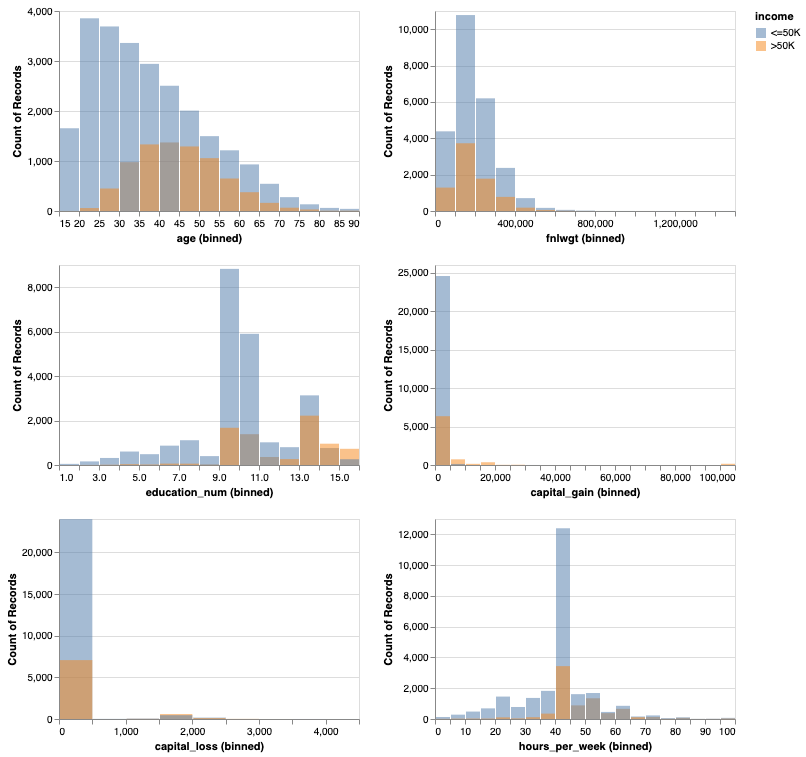

In [28]:
#--Exploring features--


feature_plot = alt.Chart(train_df).mark_bar(opacity=0.5).encode(
     alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=20)),
     alt.Y("count()", stack = False),
     color = "income").properties(
    width=300,
    height=200).repeat(numeric_cols, columns=2)

feature_plot




In [29]:
# Finding the correlation

In [30]:
corrMatrix = train_df.corr()
# print(corrMatrix)

In [31]:
# plotting the correlations

In [32]:
corr_df = train_df.select_dtypes('number').corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()
# corr_df

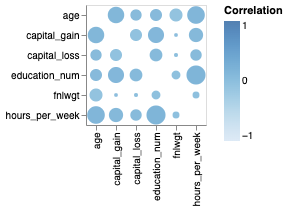

In [33]:
alt.Chart(corr_df).mark_circle().encode(
    x=alt.X('level_0', title=''),
    y=alt.Y('level_1', title=''),
    size=alt.Size('abs', legend=None),
    color=alt.Color('corr', scale=alt.Scale(domain=(-1, 1)), title='Correlation'))

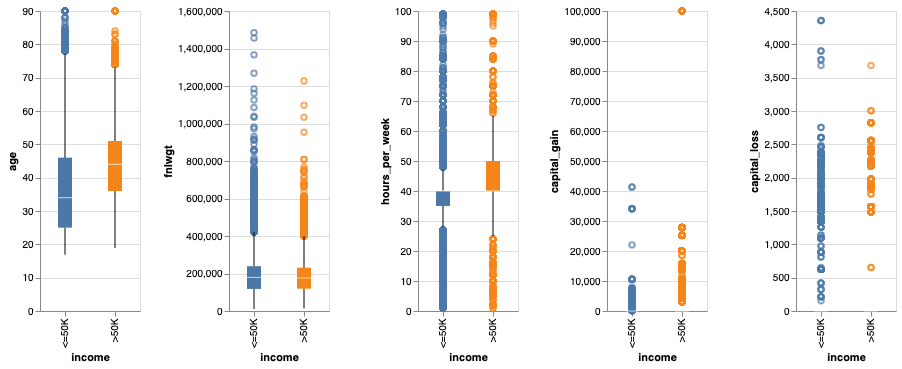

In [34]:
# Visualizing key numeric features vs the target class

alt.Chart(train_df).mark_boxplot().encode(
    alt.X('income', type='ordinal'),
    alt.Y(alt.repeat("column"), type='quantitative'),
    color=alt.Color('income:N', legend=None)
).properties(width = 100).repeat(
    column=['age', 'fnlwgt', 'hours_per_week', 'capital_gain', 'capital_loss'],
)

</br></br>

### Visualising categorical features

In [35]:
categorical_cols = list(set(train_df.columns) - set(numeric_cols))

# Removing native_country column due to high class imbalance
categorical_cols.remove('native_country')

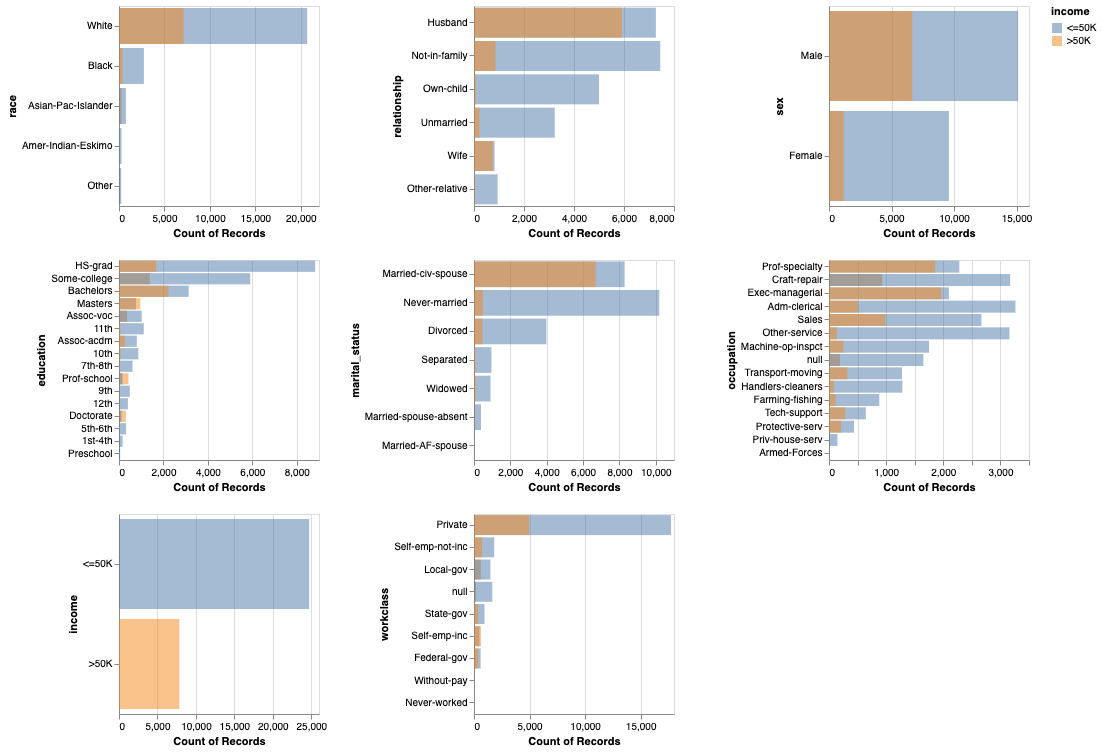

In [36]:
# Exploring categorical features

alt.Chart(train_df).mark_bar(opacity=0.5).encode(
     alt.X("count()", stack = False),
     alt.Y(alt.repeat(), type="ordinal", sort = '-x'),
     color = "income").properties(
    width=200,
    height=200).repeat(categorical_cols, columns=3)

In [37]:
# Handling class imbalance for native_country

train_df.loc[train_df['native_country'] != 'United-States', 'native_country'] = 'Non-United-States'

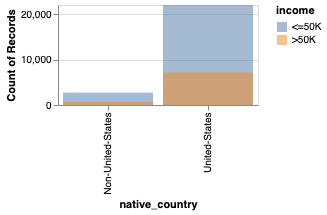

In [38]:
# Visualizing the native_country column

alt.Chart(train_df).mark_bar(opacity=0.5).encode(
     alt.X("native_country", type="ordinal"),
     alt.Y('count()',  stack = False),
     color = "income").properties(
    width=200,
    height=100)

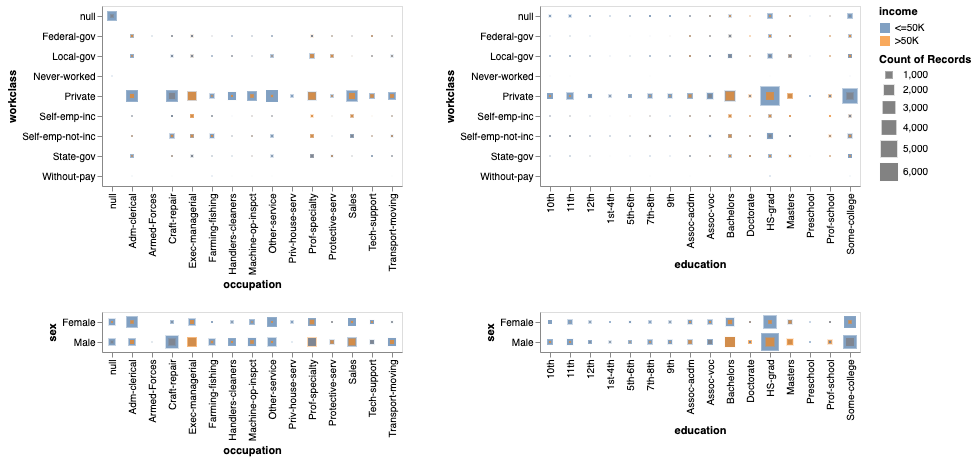

In [39]:
# Exploring association between categorical features

alt.Chart(train_df).mark_square(opacity=0.7).encode(
    alt.X(alt.repeat("column"), type='ordinal'),
    alt.Y(alt.repeat("row"), type='ordinal'),
    color='income:N',
    size='count()'
).repeat(
    row=['workclass', 'sex'],
    column=['occupation', 'education']
)